#### NOTEBOOK DE MACHINE LEARNING

##### MPV - Sprint 4
Juliana Pereira Adler (CPF 060.670.557-08)

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder ## importei para encode
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

**Heart Failure Prediction Dataset**

Dataset => https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

*Informações do Dataset*<br>
Este conjunto de dados foi criado a partir da combinação de informações provenientes de diversas fontes, incluindo o Instituto Húngaro de Cardiologia, hospitais universitários na Suíça, e o Centro Médico da VA em Long Beach e na Cleveland Clinic Foundation.<br>
Incluem 11 características essenciais que ajudam na predição de doenças cardíacas:

<u>Idade (Age)</u>: A idade do paciente em anos.<br>
<u>Sexo (Sex)</u>: O sexo do paciente [M: Masculino, F: Feminino].
<u>Tipo de Dor no Peito (ChestPainType)</u>: Inclui Angina Típica (TA), Angina Atípica (ATA), Dor Não Anginal (NAP) e Assintomático (ASY).<br>
<u>Pressão Arterial em Repouso (RestingBP)</u>: Medida em mm Hg.<br>
<u>Colesterol (Cholesterol)</u>: Medido em mm/dl.<br>
<u>Glicemia em Jejum (FastingBS)</u>: Indica diabetes se > 120 mg/dl.<br>
<u>ECG em Repouso (RestingECG)</u>: Inclui normal, anormalidades de onda ST-T, e hipertrofia ventricular esquerda.<br>
<u>Frequência Cardíaca Máxima (MaxHR)</u>: Valor numérico entre 60 e 202.<br>
<u>Angina Induzida por Exercício (ExerciseAngina)</u>: Indica a presença ou ausência de angina.<br>
<u>Oldpeak (Oldpeak)</u>: Depressão do segmento ST medida em milímetros.<br>
<u>Inclinação do Segmento ST (ST_Slope)</u>: Classificado como ascendente, plano ou descendente.<br>


#### Carga do Dataset

In [2]:
# Informa a URL de importação do dataset
url = "HeartFailurePredictionDataset.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Identificar o volume de dados do DataFrame
print("Entradas: ", dataset.shape[0], "dados")
print("Variáveis: ", dataset.shape[1], "colunas \n")

# Verificar os tipos de cada variável (coluna)
display(dataset.dtypes)

# Verificando se há valores nan no conjunto de dados
print("---------")
print(dataset.isna().sum())

# Verificando os valores únicos em cada coluna
uniqueValues = dataset.nunique()
print("---------")
print(uniqueValues)

Entradas:  918 dados
Variáveis:  12 colunas 



Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

---------
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
---------
Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


In [5]:
# LabelEncoder
# Aplicar LabelEncoder na colunas que tem texto

encoder = LabelEncoder()
dataset['Sex'] = encoder.fit_transform(dataset['Sex'])
# M=1 F=0
dataset['ChestPainType'] = encoder.fit_transform(dataset['ChestPainType'])
# TA=3 ATA=1 NAP=2 ASY=0
dataset['RestingECG'] = encoder.fit_transform(dataset['RestingECG'])
# Normal=1 ST=2 LVH=0
dataset['ST_Slope'] = encoder.fit_transform(dataset['ST_Slope'])
# Flat=1 Up=2 Down=0
dataset['ExerciseAngina'] = encoder.fit_transform(dataset['ExerciseAngina'])
# N=0 Y=1

In [6]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [6]:
dataset.to_csv('HeartFailurePredictionDataset_golden.csv', index=False)

#### Separação em conjunto de treino e conjunto de teste com holdout

In [6]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:11] 
y = array[:,11]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

#### Modelagem e Inferência
##### Criação e avaliação de modelos: linha base

KNN: 0.712440 (0.050166)
CART: 0.809348 (0.036109)
NB: 0.852962 (0.042897)
SVM: 0.728971 (0.030971)


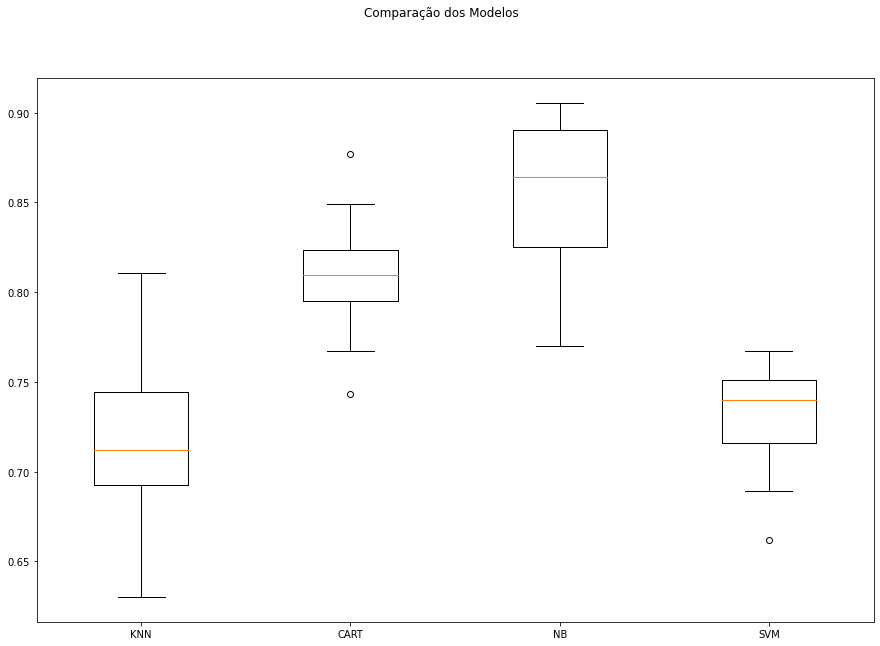

In [7]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.712 (0.050)
CART-orig: 0.809 (0.036)
NB-orig: 0.853 (0.043)
SVM-orig: 0.729 (0.031)
KNN-padr: 0.857 (0.032)
CART-padr: 0.798 (0.025)
NB-padr: 0.853 (0.043)
SVM-padr: 0.868 (0.033)
KNN-norm: 0.849 (0.033)
CART-norm: 0.801 (0.040)
NB-norm: 0.853 (0.043)
SVM-norm: 0.865 (0.040)


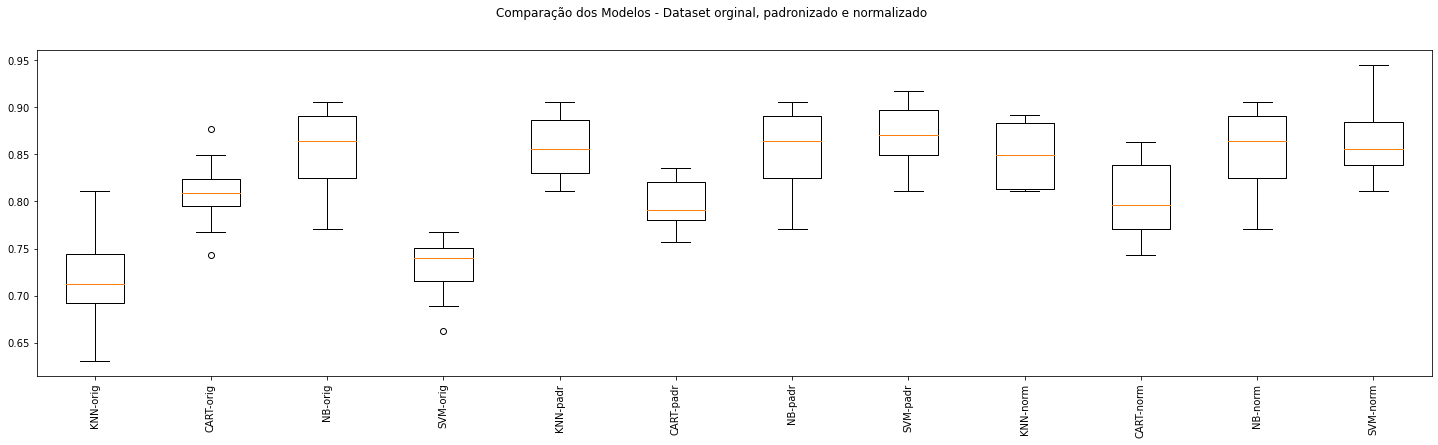

In [8]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

#### Otimização dos hiperparâmetros

In [10]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Modelo: knn-orig - Melhor: 0.761699 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}
Modelo: knn-padr - Melhor: 0.881470 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 17}
Modelo: knn-norm - Melhor: 0.863773 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 17}


In [11]:
#Melhor: Modelo: knn-padr - Melhor: 0.881470 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 17}

#### Finalização do Modelo

In [12]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=17)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.875


In [13]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=17)

#### Simulando a aplicação do modelo em dados não vistos

In [18]:
# Novos dados - não sabemos a classe!
data = {'Age':  [32, 20, 19],
        'Sex': [0, 1, 0],
        'ChestPainType': [0, 0, 0],
        'RestingBP': [120, 120, 120],
        'Cholesterol': [141, 141, 400],
        'FastingBS': [0, 0, 1],
        'RestingECG': [0, 0, 1],
        'MaxHR': [80, 120, 200],
        'ExerciseAngina': [1, 0, 0],
        'Oldpeak': [0, 0, 0],
        'ST_Slope': [0, 0, 0],
        }

atributos = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 
             'Oldpeak', 'ST_Slope']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,:].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-2.2817231  -1.93816322 -0.81699495 -0.66993455 -0.52869702 -0.55134134
  -1.56670996 -2.23250548  1.21424608 -0.83243239 -2.24427006]
 [-3.55459806  0.51595242 -0.81699495 -0.66993455 -0.52869702 -0.55134134
  -1.56670996 -0.66057778 -0.8235563  -0.83243239 -2.24427006]
 [-3.66067097 -1.93816322 -0.81699495 -0.66993455  1.84039572  1.81375843
   0.01725451  2.4832776  -0.8235563  -0.83243239 -2.24427006]]


In [19]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1. 1. 0.]


#### Exportar Modelo


In [22]:
# Salvando o modelo treinado em um arquivo
pickle_out = open('model.pkl', 'wb')
pickle.dump(model, pickle_out)
pickle_out.close()